In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

from collections import Counter
from collections import defaultdict

In [9]:
dataset=pd.read_csv('nuovo_dataset_totale.csv')

In [10]:
dataset.columns

Index(['id', 'name', 'disc_number', 'duration_ms', 'explicit', 'popularity',
       'track_number', 'artists', 'album_type', 'album_name',
       'album_release_date', 'album_release_date_precision',
       'album_total_tracks', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'tempo_confidence',
       'time_signature_confidence', 'key_confidence', 'mode_confidence',
       'n_bars', 'genre', 'popularity_artist'],
      dtype='object')

In [11]:
dataset

,id,name,disc_number,duration_ms,explicit,popularity,track_number,artists,album_type,album_name,...,valence,tempo,time_signature,tempo_confidence,time_signature_confidence,key_confidence,mode_confidence,n_bars,genre,popularity_artist
0,4rjA5kJJWbwU1prXCvg6Fk,Grey,1.0,290.48,False,52.0,5.0,Kölsch,album,1989,...,0.24,186.00,3.0,0.02,1.00,0.50,0.52,234.0,minimal-techno,[51.0]
1,6xzpUzzIquIyUzTLbbgSdI,Thrown,1.0,539.23,False,45.0,5.0,Kiasmos,album,Kiasmos,...,0.14,120.02,4.0,0.68,0.33,0.41,0.59,269.0,minimal-techno,[47.0]
2,56tXgHlSHCfgmGhwVXNizc,Routine,1.0,264.20,False,39.0,5.0,Joris Delacroix,album,Night Visions,...,0.32,118.05,3.0,0.85,0.46,0.90,0.76,171.0,minimal-techno,[44.0]
3,0s3wIBczp6TdSJ2y8cveJl,Confronted - Anfisa Letyago Stranger Remix,1.0,387.41,False,0.0,6.0,Pan-Pot;Anfisa Letyago,single,Confronted Remixes,...,0.04,128.99,4.0,0.88,0.50,0.51,0.50,207.0,minimal-techno,"[36.0, 40.0]"
4,4PSbDDd1LRYMhqPXvza6I2,Jupiter Sunrise,1.0,248.96,False,0.0,1.0,Kollektiv Turmstrasse,compilation,10 Years Diynamic,...,0.12,120.00,4.0,0.88,1.00,0.47,0.46,123.0,minimal-techno,[45.0]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109144,0wiDjWz3U1WfwXSrWHXe2b,I'm Good (Blue) - REAPER Extended Remix,1.0,209.66,True,23.0,2.0,David Guetta;Bebe Rexha;REAPER,single,I'm Good (Blue) [REAPER Remix],...,0.37,173.96,4.0,0.73,1.00,0.09,0.18,145.0,edm,"[86.0, 79.0, 50.0]"
109145,46n9OJc7LOIVdj8t2l5WA5,End Of The Night,1.0,205.72,True,56.0,1.0,Danny Avila,single,End Of The Night,...,0.31,99.97,4.0,0.71,1.00,0.40,0.54,84.0,edm,[47.0]
109146,127uq83uGFapbddqiMUKky,Sexy Bitch (feat. Akon),1.0,195.85,True,80.0,3.0,David Guetta;Akon,album,One More Love,...,0.80,130.01,4.0,0.81,0.99,0.10,0.33,106.0,edm,"[86.0, 79.0]"
109147,0ZdUHFxifUJNqo7G4aJzoF,Savannah,1.0,208.70,False,60.0,1.0,Diviners;Philly K.,single,Savannah,...,0.39,108.07,4.0,0.65,1.00,0.55,0.60,89.0,edm,"[47.0, 38.0]"


In [12]:
len(dataset)

109149

In [13]:
from sklearn.neighbors import KNeighborsClassifier

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
dataset=dataset.drop(['id'], axis=1)

In [16]:
dataset

,name,disc_number,duration_ms,explicit,popularity,track_number,artists,album_type,album_name,album_release_date,...,valence,tempo,time_signature,tempo_confidence,time_signature_confidence,key_confidence,mode_confidence,n_bars,genre,popularity_artist
0,Grey,1.0,290.48,False,52.0,5.0,Kölsch,album,1989,2017-09-22,...,0.24,186.00,3.0,0.02,1.00,0.50,0.52,234.0,minimal-techno,[51.0]
1,Thrown,1.0,539.23,False,45.0,5.0,Kiasmos,album,Kiasmos,2014-10-27,...,0.14,120.02,4.0,0.68,0.33,0.41,0.59,269.0,minimal-techno,[47.0]
2,Routine,1.0,264.20,False,39.0,5.0,Joris Delacroix,album,Night Visions,2018-06-22,...,0.32,118.05,3.0,0.85,0.46,0.90,0.76,171.0,minimal-techno,[44.0]
3,Confronted - Anfisa Letyago Stranger Remix,1.0,387.41,False,0.0,6.0,Pan-Pot;Anfisa Letyago,single,Confronted Remixes,2019-12-06,...,0.04,128.99,4.0,0.88,0.50,0.51,0.50,207.0,minimal-techno,"[36.0, 40.0]"
4,Jupiter Sunrise,1.0,248.96,False,0.0,1.0,Kollektiv Turmstrasse,compilation,10 Years Diynamic,2016-09-16,...,0.12,120.00,4.0,0.88,1.00,0.47,0.46,123.0,minimal-techno,[45.0]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109144,I'm Good (Blue) - REAPER Extended Remix,1.0,209.66,True,23.0,2.0,David Guetta;Bebe Rexha;REAPER,single,I'm Good (Blue) [REAPER Remix],2022-10-21,...,0.37,173.96,4.0,0.73,1.00,0.09,0.18,145.0,edm,"[86.0, 79.0, 50.0]"
109145,End Of The Night,1.0,205.72,True,56.0,1.0,Danny Avila,single,End Of The Night,2018-11-16,...,0.31,99.97,4.0,0.71,1.00,0.40,0.54,84.0,edm,[47.0]
109146,Sexy Bitch (feat. Akon),1.0,195.85,True,80.0,3.0,David Guetta;Akon,album,One More Love,2010-11-22,...,0.80,130.01,4.0,0.81,0.99,0.10,0.33,106.0,edm,"[86.0, 79.0]"
109147,Savannah,1.0,208.70,False,60.0,1.0,Diviners;Philly K.,single,Savannah,2015-11-25,...,0.39,108.07,4.0,0.65,1.00,0.55,0.60,89.0,edm,"[47.0, 38.0]"


In [17]:
dataset.columns

Index(['name', 'disc_number', 'duration_ms', 'explicit', 'popularity',
       'track_number', 'artists', 'album_type', 'album_name',
       'album_release_date', 'album_release_date_precision',
       'album_total_tracks', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'tempo_confidence',
       'time_signature_confidence', 'key_confidence', 'mode_confidence',
       'n_bars', 'genre', 'popularity_artist'],
      dtype='object')

In [18]:
mode=dataset['mode']

In [19]:
mode

0         1
1         0
2         0
3         0
4         0
         ..
109144    0
109145    1
109146    0
109147    1
109148    1
Name: mode, Length: 109149, dtype: int64

In [20]:
dataset[['popularity_artist']]

,popularity_artist
0,[51.0]
1,[47.0]
2,[44.0]
3,"[36.0, 40.0]"
4,[45.0]
...,...
109144,"[86.0, 79.0, 50.0]"
109145,[47.0]
109146,"[86.0, 79.0]"
109147,"[47.0, 38.0]"


In [21]:
# Funzione per trasformare le stringhe in liste di float
def trasforma_in_lista(lst_str):
    # Rimuovi i caratteri '[' e ']' e splitta la stringa
    lst_str = lst_str.strip('][').split(', ')
    # Utilizza eval per valutare la lista di stringhe e convertirla in una lista di float
    return [float(x) for x in lst_str]

# Applica la funzione a ciascun valore nella colonna
dataset['popularity_artist'] = dataset['popularity_artist'].apply(trasforma_in_lista)

# Calcola la media di ciascuna lista
dataset['popularity_artist'] = round(dataset['popularity_artist'].apply(np.mean),2)


In [22]:
dataset

,name,disc_number,duration_ms,explicit,popularity,track_number,artists,album_type,album_name,album_release_date,...,valence,tempo,time_signature,tempo_confidence,time_signature_confidence,key_confidence,mode_confidence,n_bars,genre,popularity_artist
0,Grey,1.0,290.48,False,52.0,5.0,Kölsch,album,1989,2017-09-22,...,0.24,186.00,3.0,0.02,1.00,0.50,0.52,234.0,minimal-techno,51.00
1,Thrown,1.0,539.23,False,45.0,5.0,Kiasmos,album,Kiasmos,2014-10-27,...,0.14,120.02,4.0,0.68,0.33,0.41,0.59,269.0,minimal-techno,47.00
2,Routine,1.0,264.20,False,39.0,5.0,Joris Delacroix,album,Night Visions,2018-06-22,...,0.32,118.05,3.0,0.85,0.46,0.90,0.76,171.0,minimal-techno,44.00
3,Confronted - Anfisa Letyago Stranger Remix,1.0,387.41,False,0.0,6.0,Pan-Pot;Anfisa Letyago,single,Confronted Remixes,2019-12-06,...,0.04,128.99,4.0,0.88,0.50,0.51,0.50,207.0,minimal-techno,38.00
4,Jupiter Sunrise,1.0,248.96,False,0.0,1.0,Kollektiv Turmstrasse,compilation,10 Years Diynamic,2016-09-16,...,0.12,120.00,4.0,0.88,1.00,0.47,0.46,123.0,minimal-techno,45.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109144,I'm Good (Blue) - REAPER Extended Remix,1.0,209.66,True,23.0,2.0,David Guetta;Bebe Rexha;REAPER,single,I'm Good (Blue) [REAPER Remix],2022-10-21,...,0.37,173.96,4.0,0.73,1.00,0.09,0.18,145.0,edm,71.67
109145,End Of The Night,1.0,205.72,True,56.0,1.0,Danny Avila,single,End Of The Night,2018-11-16,...,0.31,99.97,4.0,0.71,1.00,0.40,0.54,84.0,edm,47.00
109146,Sexy Bitch (feat. Akon),1.0,195.85,True,80.0,3.0,David Guetta;Akon,album,One More Love,2010-11-22,...,0.80,130.01,4.0,0.81,0.99,0.10,0.33,106.0,edm,82.50
109147,Savannah,1.0,208.70,False,60.0,1.0,Diviners;Philly K.,single,Savannah,2015-11-25,...,0.39,108.07,4.0,0.65,1.00,0.55,0.60,89.0,edm,42.50


In [23]:
X=dataset.drop(['mode','name', 'explicit', 'artists', 'disc_number','album_type', 'album_release_date', 'album_release_date_precision',
       'album_total_tracks', 'album_name', 'mode_confidence', 'genre', ], axis=1)

In [24]:
X

,duration_ms,popularity,track_number,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,tempo_confidence,time_signature_confidence,key_confidence,n_bars,popularity_artist
0,290.48,52.0,5.0,0.53,0.52,0.0,-9.85,0.49,0.55,0.54,0.09,0.24,186.00,3.0,0.02,1.00,0.50,234.0,51.00
1,539.23,45.0,5.0,0.75,0.34,5.0,-12.76,0.03,0.17,0.65,0.11,0.14,120.02,4.0,0.68,0.33,0.41,269.0,47.00
2,264.20,39.0,5.0,0.80,0.64,7.0,-10.68,0.10,0.03,0.47,0.07,0.32,118.05,3.0,0.85,0.46,0.90,171.0,44.00
3,387.41,0.0,6.0,0.68,0.54,6.0,-11.98,0.06,0.05,0.72,0.11,0.04,128.99,4.0,0.88,0.50,0.51,207.0,38.00
4,248.96,0.0,1.0,0.76,0.67,11.0,-13.35,0.04,0.51,0.92,0.12,0.12,120.00,4.0,0.88,1.00,0.47,123.0,45.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109144,209.66,23.0,2.0,0.47,0.98,5.0,-2.67,0.08,0.01,0.32,0.36,0.37,173.96,4.0,0.73,1.00,0.09,145.0,71.67
109145,205.72,56.0,1.0,0.67,0.72,9.0,-4.48,0.03,0.37,0.00,0.08,0.31,99.97,4.0,0.71,1.00,0.40,84.0,47.00
109146,195.85,80.0,3.0,0.81,0.63,11.0,-5.02,0.05,0.08,0.00,0.13,0.80,130.01,4.0,0.81,0.99,0.10,106.0,82.50
109147,208.70,60.0,1.0,0.65,0.78,0.0,-3.13,0.04,0.37,0.00,0.04,0.39,108.07,4.0,0.65,1.00,0.55,89.0,42.50


In [25]:
y=mode

In [26]:
y

0         1
1         0
2         0
3         0
4         0
         ..
109144    0
109145    1
109146    0
109147    1
109148    1
Name: mode, Length: 109149, dtype: int64

In [27]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=72)

## Normalization

In [28]:
from sklearn.preprocessing import StandardScaler

In [29]:
norm = StandardScaler()
norm.fit(X_train)

X_train_norm = norm.transform(X_train)
X_test_norm = norm.transform(X_test)

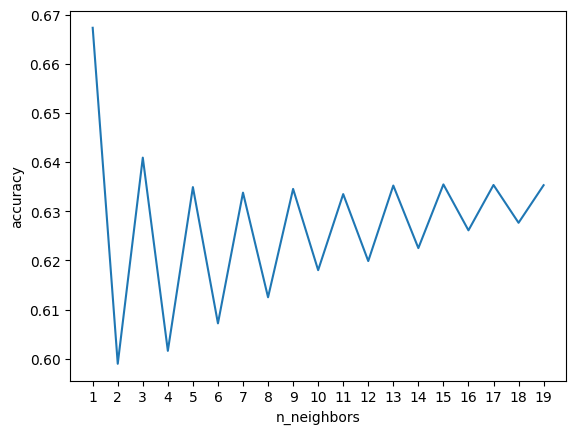

In [23]:
n_neighbors = range(1,20)
scores = list()

for n in n_neighbors:
    clf = KNeighborsClassifier(n_neighbors=n, metric="euclidean")
    clf.fit(X_train, y_train)
    scores.append(clf.score(X_test, y_test))

plt.plot(scores)
plt.xticks(range(len(n_neighbors)), n_neighbors)
plt.xlabel("n_neighbors")
plt.ylabel("accuracy")
plt.show()

In [26]:
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

# Definisci una lista di valori di k da testare
k_values = list(range(1, 31))  # Prova k da 1 a 30

# Inizializza una lista per memorizzare le medie delle accuratezze per ogni valore di k
mean_accuracies = []

# Itera su ogni valore di k
for k in k_values:
    # Inizializza il classificatore KNN con il valore di k corrente
    knn = KNeighborsClassifier(n_neighbors=k,  metric='euclidean') #vedi se mettere pesi
    
    # Esegui la k-fold cross-validation con k=5
    scores = cross_val_score(knn, X, y, cv=5)
    
    # Calcola la media delle accuratezze per questo valore di k
    mean_accuracy = np.mean(scores)
    
    # Aggiungi la media delle accuratezze alla lista
    mean_accuracies.append(mean_accuracy)

# Trova il valore di k che massimizza l'accuratezza media
best_k = k_values[np.argmax(mean_accuracies)]
best_accuracy = np.max(mean_accuracies)

print("Best k:", best_k)
print("Best Accuracy:", best_accuracy)

Best k: 1
Best Accuracy: 0.6517966460960969


In [27]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

# Supponiamo che tu abbia già diviso i tuoi dati in X_train e y_train

# Creazione di un classificatore KNN
knn = KNeighborsClassifier(n_neighbors=1)

# Eseguiamo la cross-validation con 5 fold
scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')

# Stampa dei punteggi ottenuti in ogni fold
print("Punteggi della cross-validation:", scores)

# Calcolo dell'accuracy media
print("Accuracy media:", scores.mean())


Punteggi della cross-validation: [0.65918461 0.65536723 0.66200947 0.65605436 0.65098878]
Accuracy media: 0.6567208885139115


In [28]:
clf = KNeighborsClassifier(n_neighbors=1, metric="euclidean")
clf.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=1)

In [29]:
y_pred = clf.predict(X_test)
y_pred

array([1, 0, 0, ..., 0, 0, 1])

In [30]:
 from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.54      0.54      0.54     15666
           1       0.74      0.74      0.74     27994

    accuracy                           0.67     43660
   macro avg       0.64      0.64      0.64     43660
weighted avg       0.67      0.67      0.67     43660



## Balancing

In [31]:
import warnings
warnings.simplefilter("ignore")

In [37]:
print('Original dataset shape %s' % Counter(y_train))

Original dataset shape Counter({1: 41894, 0: 23595})


In [33]:
from imblearn.under_sampling import TomekLinks
tl = TomekLinks()
X_res, y_res = tl.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))


Resampled dataset shape Counter({1: 37284, 0: 23595})


In [34]:
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
import numpy as np

# Definisci una lista di valori di k da testare
k_values = list(range(1, 31))  # Prova k da 1 a 30

# Inizializza una lista per memorizzare le medie delle accuratezze per ogni valore di k
mean_accuracies = []

# Itera su ogni valore di k
for k in k_values:
    # Inizializza il classificatore KNN con il valore di k corrente
    knn = KNeighborsClassifier(n_neighbors=k,  metric='euclidean')
    
    # Esegui la k-fold cross-validation con k=5
    scores = cross_val_score(knn, X_res, y_res, cv=5)
    
    # Calcola la media delle accuratezze per questo valore di k
    mean_accuracy = np.mean(scores)
    
    # Aggiungi la media delle accuratezze alla lista
    mean_accuracies.append(mean_accuracy)

# Trova il valore di k che massimizza l'accuratezza media
best_k = k_values[np.argmax(mean_accuracies)]
best_accuracy = np.max(mean_accuracies)

print("Best k:", best_k)
print("Best Accuracy:", best_accuracy)

Best k: 1
Best Accuracy: 0.7172259266554598


In [49]:
clf_balanced = KNeighborsClassifier(n_neighbors=best_k, metric="euclidean")
clf_balanced.fit(X_res, y_res)

KNeighborsClassifier(metric='euclidean', n_neighbors=1)

In [ ]:
y_pred = clf_balanced.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 1])

In [48]:
from sklearn.metrics import accuracy_score
print('Accuracy %s' % accuracy_score(y_test, y_pred))

Accuracy 0.6475492441594136


In [51]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.51      0.58      0.54     15666
           1       0.75      0.68      0.71     27994

    accuracy                           0.65     43660
   macro avg       0.63      0.63      0.63     43660
weighted avg       0.66      0.65      0.65     43660



 
Edited

In [30]:
from imblearn.under_sampling import EditedNearestNeighbours

In [31]:

enn = EditedNearestNeighbours()
X_res, y_res = enn.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({0: 23595, 1: 16775})


In [34]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
import numpy as np

# Definisci una lista di valori di k da testare
k_values = list(range(1, 31))  # Prova k da 1 a 30

# Inizializza una lista per memorizzare le medie delle accuratezze per ogni valore di k
mean_accuracies = []

# Itera su ogni valore di k
for k in k_values:
    # Inizializza il classificatore KNN con il valore di k corrente
    knn = KNeighborsClassifier(n_neighbors=k,  metric='euclidean')
    
    # Esegui la k-fold cross-validation con k=5
    scores = cross_val_score(knn, X_res, y_res, cv=5)
    
    # Calcola la media delle accuratezze per questo valore di k
    mean_accuracy = np.mean(scores)
    
    # Aggiungi la media delle accuratezze alla lista
    mean_accuracies.append(mean_accuracy)

# Trova il valore di k che massimizza l'accuratezza media
best_k = k_values[np.argmax(mean_accuracies)]
best_accuracy = np.max(mean_accuracies)

print("Best k:", best_k)
print("Best Accuracy:", best_accuracy)

Best k: 1
Best Accuracy: 0.8694327470894228


In [35]:
clf_balanced = KNeighborsClassifier(n_neighbors=best_k, metric="euclidean")
clf_balanced.fit(X_res, y_res)

KNeighborsClassifier(metric='euclidean', n_neighbors=1)

In [36]:
y_pred = clf_balanced.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [37]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.43      0.78      0.55     15666
           1       0.77      0.42      0.54     27994

    accuracy                           0.55     43660
   macro avg       0.60      0.60      0.55     43660
weighted avg       0.65      0.55      0.55     43660

